In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.preprocessing import normalize

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

from scipy.optimize import curve_fit

In [2]:
# Read the dataset
data = pd.read_excel('world_bank_data.xlsx',header=0,sheet_name='WBD',usecols='A:R')[:44]

data.head(10)

,Country,Year,Air Passengers,Education Expenditure (% of GDP),Electricity Consumption (kWh per capita),Foreign Direct Investment (% of GDP),GDP (current US$),GDP per Capita (current US$),Gini Index (Income Inequality),Inflation (annual %),Life Expectancy at Birth (years),Literacy Rate (% of adults),Population,Population Growth Rate (%),Poverty Rate (% below $1.90 a day),Trade Balance (% of GDP),Unemployment Rate (%),Urbanization Rate (%)
0,Bangladesh,1980,613700.0,0.93760,95.463663,0.046918,1.813805e+10,206.075714,33.0,15.000000,51.850,28.0,88016432,2.393149,74.0,-12.388664,4.0,14.851
1,Bangladesh,1981,591400.0,1.07150,94.949924,0.026470,2.024969e+10,224.241392,NaN,NaN,52.169,29.0,90303105,2.564832,NaN,-8.985433,NaN,15.801
2,Bangladesh,1982,621500.0,1.01164,97.588570,0.037570,1.852540e+10,199.595945,NaN,NaN,52.540,NaN,92814507,2.743111,NaN,-10.456324,NaN,16.212
3,Bangladesh,1983,623000.0,1.03267,97.290186,0.002294,1.760905e+10,184.706773,25.9,NaN,53.011,NaN,95335155,2.679568,37.3,-9.109183,NaN,16.631
4,Bangladesh,1984,741800.0,1.22303,96.203111,-0.002924,1.892084e+10,193.435021,NaN,NaN,53.540,NaN,97814966,2.567896,NaN,-10.019217,NaN,17.060
5,Bangladesh,1985,845300.0,1.27118,99.257480,-0.029894,2.227842e+10,222.220180,26.9,NaN,53.897,NaN,100253825,2.462763,32.0,-7.453227,NaN,17.496
6,Bangladesh,1986,852400.0,1.34349,103.810704,0.011190,2.177403e+10,212.148994,NaN,NaN,54.415,NaN,102635572,2.347936,NaN,-6.652879,NaN,17.941
7,Bangladesh,1987,861000.0,1.51364,99.933040,0.013191,2.429803e+10,231.499584,NaN,9.874696,54.926,NaN,104959291,2.238799,NaN,-6.707698,NaN,18.395
8,Bangladesh,1988,1004900.0,NaN,107.511613,0.006916,2.657901e+10,247.901466,28.8,7.412766,55.027,NaN,107216008,2.127300,41.7,-6.821462,NaN,18.859
9,Bangladesh,1989,997400.0,NaN,110.572530,0.000861,2.878172e+10,263.005721,NaN,6.045480,55.089,NaN,109433799,2.047423,NaN,-7.244887,NaN,19.330


In [3]:
# Replace the missing inbetween data
data.interpolate(method='linear',axis=0,inplace=True) 
data.head(8)

C:\Users\Kinshuk Mangal\AppData\Local\Temp\ipykernel_33592\3323613128.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear',axis=0,inplace=True)


,Country,Year,Air Passengers,Education Expenditure (% of GDP),Electricity Consumption (kWh per capita),Foreign Direct Investment (% of GDP),GDP (current US$),GDP per Capita (current US$),Gini Index (Income Inequality),Inflation (annual %),Life Expectancy at Birth (years),Literacy Rate (% of adults),Population,Population Growth Rate (%),Poverty Rate (% below $1.90 a day),Trade Balance (% of GDP),Unemployment Rate (%),Urbanization Rate (%)
0,Bangladesh,1980,613700.0,0.93760,95.463663,0.046918,1.813805e+10,206.075714,33.000000,15.000000,51.850,28.0,88016432,2.393149,74.000000,-12.388664,4.000000,14.851
1,Bangladesh,1981,591400.0,1.07150,94.949924,0.026470,2.024969e+10,224.241392,30.633333,14.267814,52.169,29.0,90303105,2.564832,61.766667,-8.985433,3.836364,15.801
2,Bangladesh,1982,621500.0,1.01164,97.588570,0.037570,1.852540e+10,199.595945,28.266667,13.535627,52.540,29.6,92814507,2.743111,49.533333,-10.456324,3.672727,16.212
3,Bangladesh,1983,623000.0,1.03267,97.290186,0.002294,1.760905e+10,184.706773,25.900000,12.803441,53.011,30.2,95335155,2.679568,37.300000,-9.109183,3.509091,16.631
4,Bangladesh,1984,741800.0,1.22303,96.203111,-0.002924,1.892084e+10,193.435021,26.400000,12.071255,53.540,30.8,97814966,2.567896,34.650000,-10.019217,3.345455,17.060
5,Bangladesh,1985,845300.0,1.27118,99.257480,-0.029894,2.227842e+10,222.220180,26.900000,11.339069,53.897,31.4,100253825,2.462763,32.000000,-7.453227,3.181818,17.496
6,Bangladesh,1986,852400.0,1.34349,103.810704,0.011190,2.177403e+10,212.148994,27.533333,10.606882,54.415,32.0,102635572,2.347936,35.233333,-6.652879,3.018182,17.941
7,Bangladesh,1987,861000.0,1.51364,99.933040,0.013191,2.429803e+10,231.499584,28.166667,9.874696,54.926,32.6,104959291,2.238799,38.466667,-6.707698,2.854545,18.395


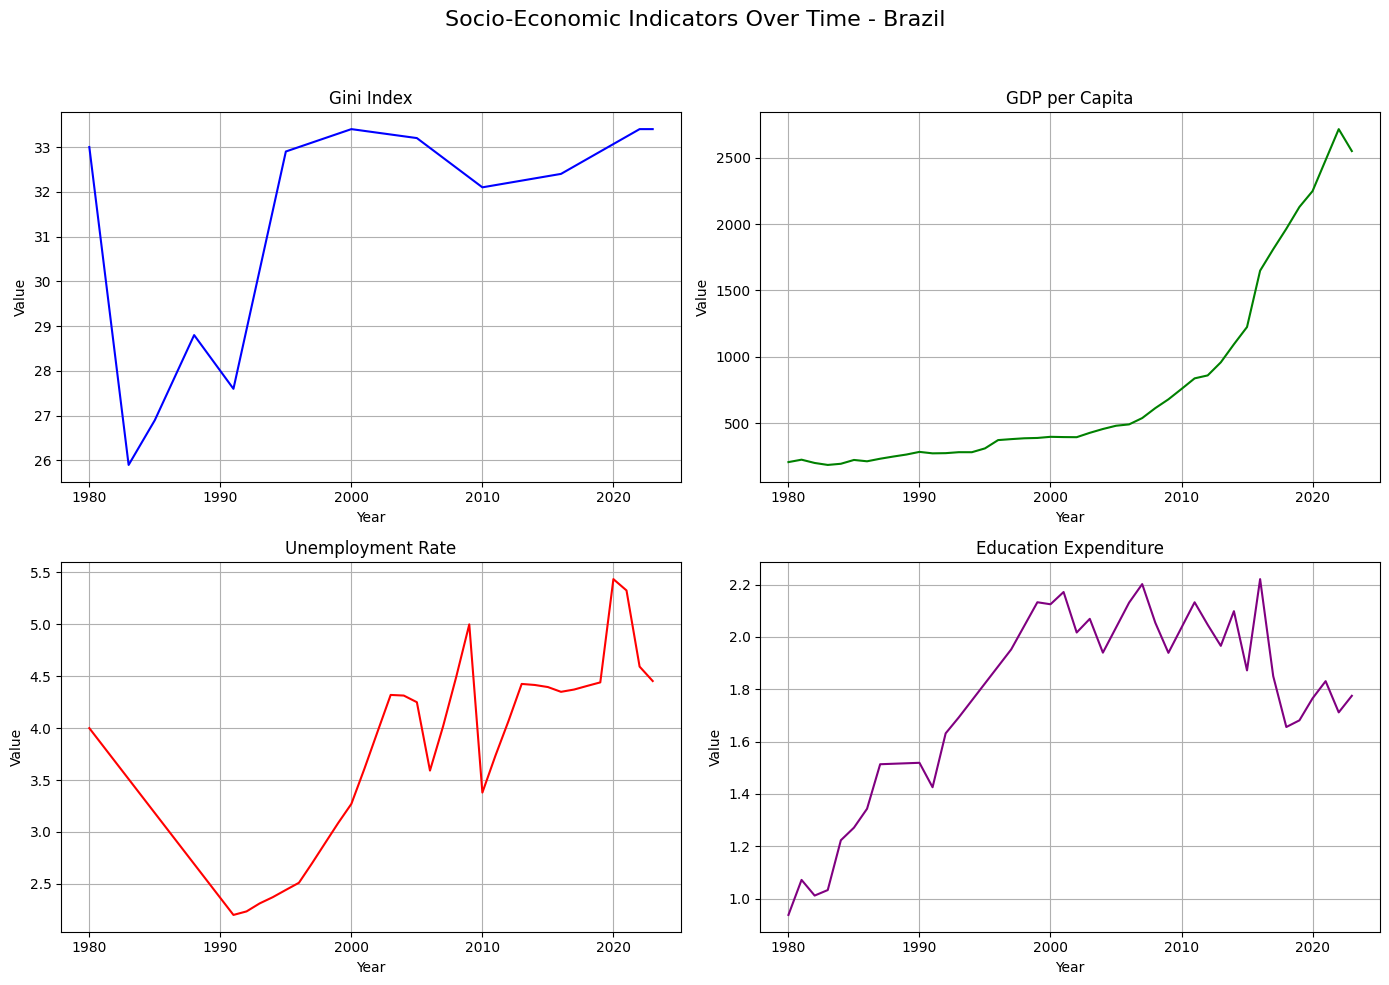

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Plot 1: Gini Index
axs[0, 0].plot(data['Year'], data['Gini Index (Income Inequality)'], color='blue')
axs[0, 0].set_title('Gini Index')

# Plot 2: GDP per Capita
axs[0, 1].plot(data['Year'], data['GDP per Capita (current US$)'], color='green')
axs[0, 1].set_title('GDP per Capita')

# Plot 3: Unemployment Rate
axs[1, 0].plot(data['Year'], data['Unemployment Rate (%)'], color='red')
axs[1, 0].set_title('Unemployment Rate')

# Plot 4: Education Expenditure
axs[1, 1].plot(data['Year'], data['Education Expenditure (% of GDP)'], color='purple')
axs[1, 1].set_title('Education Expenditure')

# Overall Title and Layout
fig.suptitle('Socio-Economic Indicators Over Time - Brazil', fontsize=16)
for ax in axs.flat:
    ax.set_xlabel('Year')
    ax.set_ylabel('Value')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

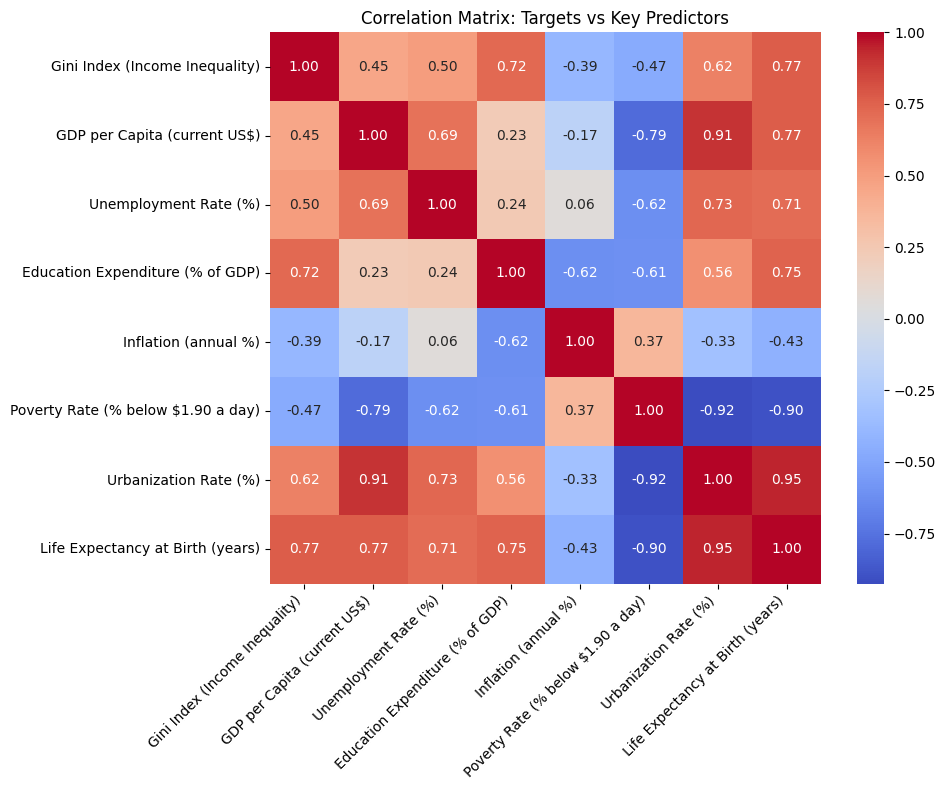

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select these 8 variables from your DataFrame
selected_columns = [
    'Gini Index (Income Inequality)',
    'GDP per Capita (current US$)',
    'Unemployment Rate (%)',
    'Education Expenditure (% of GDP)',
    'Inflation (annual %)',
    'Poverty Rate (% below $1.90 a day)',
    'Urbanization Rate (%)',
    'Life Expectancy at Birth (years)'
]

# Filter and drop missing values
selected_data = data[selected_columns].dropna()

# Compute correlation matrix
corr_matrix = selected_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix: Targets vs Key Predictors")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


We should avoid using data that does not include an initial datapoint very close to or preceding the first year of consideration.

In [5]:
df=data.drop(['Country','Inflation (annual %)', 'Unemployment Rate (%)'], axis=1)[4:]
df.head(3)

,Year,Air Passengers,Education Expenditure (% of GDP),Electricity Consumption (kWh per capita),Foreign Direct Investment (% of GDP),GDP (current US$),GDP per Capita (current US$),Gini Index (Income Inequality),Life Expectancy at Birth (years),Literacy Rate (% of adults),Population,Population Growth Rate (%),Poverty Rate (% below $1.90 a day),Trade Balance (% of GDP),Urbanization Rate (%)
4,1984,741800.0,1.22303,96.203111,-0.002924,1.892084e+10,193.435021,26.400000,53.540,30.8,97814966,2.567896,34.650000,-10.019217,17.060
5,1985,845300.0,1.27118,99.257480,-0.029894,2.227842e+10,222.220180,26.900000,53.897,31.4,100253825,2.462763,32.000000,-7.453227,17.496
6,1986,852400.0,1.34349,103.810704,0.011190,2.177403e+10,212.148994,27.533333,54.415,32.0,102635572,2.347936,35.233333,-6.652879,17.941


### Variable Selection 
- Run when necessary. <br>
While a variable can have any relationship with time, we first wish to check whether there are linear relationships between time-dependent nonnegative variables. If so, it is possible that one variable is impacting the change of the other. As we have around 40 data points, we check these with Pearson correlations. With 40 data points, a Pearson correlation coefficient value of around 0.6 or higher would generally be considered a strong positive correlation. Note that for Pearson correlation, both variables need to be normally distributed. 

In [6]:
# Pearson Correlation
corr=df.corr()
corr

,Year,Air Passengers,Education Expenditure (% of GDP),Electricity Consumption (kWh per capita),Foreign Direct Investment (% of GDP),GDP (current US$),GDP per Capita (current US$),Gini Index (Income Inequality),Life Expectancy at Birth (years),Literacy Rate (% of adults),Population,Population Growth Rate (%),Poverty Rate (% below $1.90 a day),Trade Balance (% of GDP),Urbanization Rate (%)
Year,1.000000,0.819142,0.513672,0.979048,0.641641,0.863590,0.863862,0.727278,0.970724,0.971283,0.993999,-0.941826,-0.959145,0.147577,0.989616
Air Passengers,0.819142,1.000000,0.121899,0.830795,0.392139,0.866674,0.872340,0.438019,0.757218,0.897657,0.776900,-0.719509,-0.818357,0.070361,0.856779
Education Expenditure (% of GDP),0.513672,0.121899,1.000000,0.467842,0.589854,0.087714,0.087478,0.831183,0.643914,0.366920,0.594113,-0.587013,-0.360033,0.453620,0.395920
Electricity Consumption (kWh per capita),0.979048,0.830795,0.467842,1.000000,0.708875,0.834706,0.837044,0.632622,0.934103,0.961046,0.966876,-0.949429,-0.960663,0.042338,0.978484
Foreign Direct Investment (% of GDP),0.641641,0.392139,0.589854,0.708875,1.000000,0.277157,0.279961,0.472129,0.663753,0.525695,0.676346,-0.763145,-0.618703,-0.103708,0.592426
GDP (current US$),0.863590,0.866674,0.087714,0.834706,0.277157,1.000000,0.999815,0.443983,0.769299,0.934435,0.808148,-0.696638,-0.886201,0.029655,0.917899
GDP per Capita (current US$),0.863862,0.872340,0.087478,0.837044,0.279961,0.999815,1.000000,0.442289,0.769076,0.936642,0.808164,-0.699227,-0.885983,0.029546,0.918373
Gini Index (Income Inequality),0.727278,0.438019,0.831183,0.632622,0.472129,0.443983,0.442289,1.000000,0.822654,0.629407,0.779156,-0.685877,-0.595707,0.443395,0.637434
Life Expectancy at Birth (years),0.970724,0.757218,0.643914,0.934103,0.663753,0.769299,0.769076,0.822654,1.000000,0.921440,0.984245,-0.913417,-0.911928,0.233419,0.933849
Literacy Rate (% of adults),0.971283,0.897657,0.366920,0.961046,0.525695,0.934435,0.936642,0.629407,0.921440,1.000000,0.944466,-0.871702,-0.953142,0.125151,0.986199


In [7]:
k = 14 # Number of variables without time
Dep = 7 # Dependent variable Gini
arr= np.arange(1, k+1, 1); ind=np.delete(arr, Dep-1) # Variable indecies to check

x1 = df.iloc[:, Dep]
y0=np.zeros((1,k))

for t in ind:
    x2 = df.iloc[:, t]
    r, p = stats.pearsonr(x1, x2)
    y0[0,t-1] = p
    
y1=np.array(list(df.columns[1:])); y1=[y1]
y=np.concatenate((y1,y0),axis=0)

#Select p-Value < 0.01
print(y)

[['Air Passengers' 'Education Expenditure (% of GDP)'
  'Electricity Consumption (kWh per capita)'
  'Foreign Direct Investment (% of GDP)' 'GDP (current US$)'
  'GDP per Capita (current US$)' 'Gini Index (Income Inequality)'
  'Life Expectancy at Birth (years)' 'Literacy Rate (% of adults)'
  'Population' 'Population Growth Rate (%)'
  'Poverty Rate (% below $1.90 a day)' 'Trade Balance (% of GDP)'
  'Urbanization Rate (%)']
 ['0.004701364221199971' '3.144557787343691e-11' '1.1884929182844755e-05'
  '0.002099154823434925' '0.004106978745838649' '0.004268736283813697'
  '0.0' '7.411492863212914e-11' '1.3570601114427512e-05'
  '3.1804239341700334e-09' '1.037617771941279e-06'
  '5.006465710927307e-05' '0.004162476666385376' '9.717342451644521e-06']]


Lasso regularization checks for the variables in the regularized linear model.

In [8]:
df.columns

Index(['Year', 'Air Passengers', 'Education Expenditure (% of GDP)',
       'Electricity Consumption (kWh per capita)',
       'Foreign Direct Investment (% of GDP)', 'GDP (current US$)',
       'GDP per Capita (current US$)', 'Gini Index (Income Inequality)',
       'Life Expectancy at Birth (years)', 'Literacy Rate (% of adults)',
       'Population', 'Population Growth Rate (%)',
       'Poverty Rate (% below $1.90 a day)', 'Trade Balance (% of GDP)',
       'Urbanization Rate (%)'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np

# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,3,4,5,6,8,9,10,11,12,13,14]]
y = df.iloc[:, 7]  #Gini Index

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: 0.0000
Education Expenditure (% of GDP): 0.9167
Electricity Consumption (kWh per capita): 0.0000
Foreign Direct Investment (% of GDP): -0.0000
GDP (current US$): 0.0000
GDP per Capita (current US$): 0.0000
Life Expectancy at Birth (years): 0.9115
Literacy Rate (% of adults): 0.0000
Population: 0.0000
Population Growth Rate (%): -0.0000
Poverty Rate (% below $1.90 a day): -0.0000
Trade Balance (% of GDP): 0.0750
Urbanization Rate (%): 0.0000


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import numpy as np

# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,3,4,5,6,7,9,10,11,12,13,14]]
y = df.iloc[:, 8]  #Life Expectancy

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: 0.0921
Education Expenditure (% of GDP): 0.1570
Electricity Consumption (kWh per capita): 0.0000
Foreign Direct Investment (% of GDP): 0.0000
GDP (current US$): 0.0000
GDP per Capita (current US$): 0.0000
Gini Index (Income Inequality): 0.8241
Literacy Rate (% of adults): 0.1105
Population: 4.9233
Population Growth Rate (%): -0.0000
Poverty Rate (% below $1.90 a day): -0.3501
Trade Balance (% of GDP): 0.0000
Urbanization Rate (%): 0.0000


In [11]:
# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,3,4,5,6,7,8,10,11,12,13,14]]
y = df.iloc[:, 9]  # Literacy rate

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: 1.5129
Education Expenditure (% of GDP): 0.0000
Electricity Consumption (kWh per capita): 5.6071
Foreign Direct Investment (% of GDP): 0.0000
GDP (current US$): 0.0000
GDP per Capita (current US$): 5.6828
Gini Index (Income Inequality): 0.1798
Life Expectancy at Birth (years): 2.4073
Population: 0.0000
Population Growth Rate (%): -0.0000
Poverty Rate (% below $1.90 a day): -0.0000
Trade Balance (% of GDP): 0.4526
Urbanization Rate (%): 0.0000


In [12]:
# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = df.iloc[:, 14]  #Urbanization

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: 0.0000
Education Expenditure (% of GDP): 0.0000
Electricity Consumption (kWh per capita): 2.4461
Foreign Direct Investment (% of GDP): 0.0000
GDP (current US$): 2.1385
GDP per Capita (current US$): 0.0000
Gini Index (Income Inequality): 0.0000
Life Expectancy at Birth (years): 0.0000
Literacy Rate (% of adults): 0.0000
Population: 2.1610
Population Growth Rate (%): -0.0477
Poverty Rate (% below $1.90 a day): -0.2470
Trade Balance (% of GDP): 0.0000


In [13]:
# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,4,5,6,7,8,9,10,11,12,13,14]]
y = df.iloc[:, 3]  #Electricity consumption

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: 0.2205
Education Expenditure (% of GDP): 1.7433
Foreign Direct Investment (% of GDP): 6.1833
GDP (current US$): -0.0000
GDP per Capita (current US$): -0.0000
Gini Index (Income Inequality): -1.8413
Life Expectancy at Birth (years): 0.0000
Literacy Rate (% of adults): 21.7675
Population: 0.0000
Population Growth Rate (%): -10.5465
Poverty Rate (% below $1.90 a day): -3.2130
Trade Balance (% of GDP): -1.7754
Urbanization Rate (%): 7.8988


In [14]:
# Select features (X) and target variable (y)
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,12,13,14]]
y = df.iloc[:, 11]  #Population Growth Rate

# Get column names for reference
feature_names = X.columns  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Lasso regression model
lasso = Lasso(alpha=0.25)
lasso.fit(X_scaled, y)

# Print column names with their respective coefficients
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

Air Passengers: -0.0000
Education Expenditure (% of GDP): -0.0000
Electricity Consumption (kWh per capita): -0.0921
Foreign Direct Investment (% of GDP): -0.0000
GDP (current US$): -0.0000
GDP per Capita (current US$): -0.0000
Gini Index (Income Inequality): -0.0000
Life Expectancy at Birth (years): -0.0000
Literacy Rate (% of adults): -0.0000
Population: -0.1728
Poverty Rate (% below $1.90 a day): 0.0000
Trade Balance (% of GDP): -0.0000
Urbanization Rate (%): -0.0000
